In [1]:
#pip install geopandas

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

In [3]:
# Cargar la capa temática
natalidad = "data/bogota.json"
map_data = gpd.read_file(natalidad)
#Excluir Sumapaz
map_data = map_data[map_data.OBJECTID != 89]
map_data['Codigo localidad'] = map_data['LocCodigo'].astype('int64')

In [4]:
## Leer salidas del modelo
df0 = pd.read_excel('salidas/estimacion_muertes.xlsx')
df0['%muertes_estimadas'] = df0['%muertes_estimadas']*100
df = df0[['Codigo localidad', 'year', 'pm25_pred', 'muertes_estimadas',
       '%muertes_estimadas']]


In [5]:
muertes_min = int(df0['muertes_estimadas'].min())
muertes_max = int(df0['muertes_estimadas'].max())

In [6]:
df_modelo = pd.DataFrame(data = {'Codigo localidad': df['Codigo localidad'].unique()})

In [7]:
for year in df.year.unique():
    df_year0 = df[df.year == year]
    df_year = df_year0.rename(columns = {"pm25_pred":"pm25_pred"+"_"+str(year),
                             "muertes_estimadas":"muertes_estimadas"+"_"+str(year),
                             "%muertes_estimadas":"%muertes_estimadas"+"_"+str(year)})
    df_year = df_year.drop(['year'], axis=1)
    df_modelo = pd.merge(df_modelo,df_year, how = 'left', on = 'Codigo localidad')

In [8]:
df_modelo

,Codigo localidad,pm25_pred_2008,muertes_estimadas_2008,%muertes_estimadas_2008,pm25_pred_2009,muertes_estimadas_2009,%muertes_estimadas_2009,pm25_pred_2010,muertes_estimadas_2010,%muertes_estimadas_2010,...,%muertes_estimadas_2018,pm25_pred_2019,muertes_estimadas_2019,%muertes_estimadas_2019,pm25_pred_2020,muertes_estimadas_2020,%muertes_estimadas_2020,pm25_pred_2021,muertes_estimadas_2021,%muertes_estimadas_2021
0,1,12.607740,0.000000,0.000000,12.381543,0.000000,0.000000,12.818953,0.000000,0.000000,...,0.000000,11.900172,0.000000,0.000000,11.066298,0.000000,0.000000,12.495163,0.000000,0.000000
1,2,18.213507,19.960724,9.596502,17.890028,16.641170,8.946865,18.305776,20.818106,9.773759,...,10.788214,17.163508,17.225786,7.299062,16.806974,9.302869,6.371828,20.215426,31.312097,12.832827
2,3,18.172713,19.129246,9.517038,18.003048,13.584976,9.179038,17.806191,15.436663,8.770831,...,0.000000,13.811534,0.000000,0.000000,14.055973,0.000000,0.000000,16.121956,11.417911,4.292448
3,4,17.348047,40.200099,7.745684,16.962397,34.003630,6.787152,17.840294,45.717480,8.842839,...,0.000000,12.655908,0.000000,0.000000,12.235755,0.000000,0.000000,13.886250,0.000000,0.000000
4,5,18.791679,28.022176,10.654820,18.683204,27.209844,10.465324,19.342740,38.267003,11.561028,...,2.702880,13.762488,0.000000,0.000000,13.585523,0.000000,0.000000,15.531591,13.226754,2.060242
5,6,23.097320,44.521752,16.072835,22.481735,35.437047,15.474693,23.907688,46.876597,16.801648,...,12.172224,19.127556,31.634248,11.217819,18.063529,20.648089,9.300941,21.391645,55.350194,14.302376
6,7,30.003560,94.380293,20.880596,30.464789,108.558883,21.120405,31.852605,111.624931,21.801744,...,21.082593,31.979759,160.681091,21.861373,31.440970,137.195615,21.605609,33.776185,211.412064,22.659385
7,8,26.106854,167.906768,18.512323,26.916811,169.476414,19.063714,27.987809,186.746610,19.740656,...,15.607927,22.968106,202.892613,15.950677,21.536754,156.107716,14.467814,23.168129,258.224772,16.139048
8,9,22.588353,58.585697,15.581303,22.831380,49.356848,15.819503,23.490846,60.807695,16.434512,...,15.254781,22.616195,76.327651,15.608927,22.437124,52.615256,15.429694,24.043220,93.385668,16.917693
9,10,18.361050,96.807745,9.878341,17.994720,83.192107,9.162126,18.394097,95.128727,9.940306,...,6.704002,15.913426,44.074122,3.560107,15.716034,25.232447,2.812982,16.616410,86.909507,5.836770


In [9]:
df_plot = pd.merge(map_data,df_modelo, how = 'left', on = 'Codigo localidad')

In [10]:
####Leer archivo de UPL
import requests
import geopandas as gpd
import io

# URL del archivo JSON
url = 'https://datosabiertos.bogota.gov.co/dataset/808582fc-ffc8-4649-8428-7e1fd8d3820c/resource/a5c8c591-0708-420f-8eb7-9f3147e21c40/download/unidadplaneamientolocal.json'

# Descargar el archivo JSON
response = requests.get(url)

# Cargar el archivo JSON en GeoPandas
gdf_upl = gpd.read_file(io.BytesIO(response.content))
gdf_upl.head()

,OBJECTID,CODIGO_UPL,NOMBRE,ACTO_ADMINISTRATIVO,NUMERO_ACTO_ADMINISTRATIVO,FECHA_ACTO_ADMINISTRATIVO,NORMATIVA,VOCACION,OBSERVACION,AREA_HA,SECTOR,ESCALA_CAPTURA,FECHA_CAPTURA,RESPONSABLE,RULEID,SHAPE_Length,SHAPE_Area,geometry
0,1,UPL13,Tintal,DEC,555,1640736000000,En el marco del Decreto 555 del 29 de diciembr...,Urbano-Rural,Que mediante Resolución 2050 del 23 de noviemb...,1284.993710,Sector Sur Occidente,,1669161600000,553,1,0.154174,0.001046,"POLYGON ((-74.16957 4.65632, -74.16955 4.65631..."
1,2,UPL30,Salitre,DEC,555,1640736000000,En el marco del Decreto 555 del 29 de diciembr...,Urbano,Que mediante Resolución 2050 del 23 de noviemb...,1578.491209,Sector Occidente,,1669161600000,553,1,0.144109,0.001285,"POLYGON ((-74.09471 4.66478, -74.10058 4.65718..."
2,3,UPL22,Restrepo,DEC,555,1640736000000,En el marco del Decreto 555 del 29 de diciembr...,Urbano,Que mediante Resolución 2050 del 23 de noviemb...,1075.501295,Sector Centro Ampliado,,1669161600000,553,1,0.143360,0.000876,"POLYGON ((-74.10459 4.56467, -74.10468 4.56482..."
3,4,UPL31,Puente Aranda,DEC,555,1640736000000,En el marco del Decreto 555 del 29 de diciembr...,Urbano,Que mediante Resolución 2050 del 23 de noviemb...,1731.114624,Sector Centro Ampliado,,1669161600000,553,1,0.161116,0.001410,"POLYGON ((-74.08320 4.62470, -74.08400 4.62371..."
4,5,UPL32,Teusaquillo,DEC,555,1640736000000,En el marco del Decreto 555 del 29 de diciembr...,Urbano,Que mediante Resolución 2050 del 23 de noviemb...,1419.316994,Sector Centro Ampliado,,1669161600000,553,1,0.148314,0.001156,"POLYGON ((-74.07160 4.61775, -74.07283 4.61542..."


In [11]:
gdf_upl

,OBJECTID,CODIGO_UPL,NOMBRE,ACTO_ADMINISTRATIVO,NUMERO_ACTO_ADMINISTRATIVO,FECHA_ACTO_ADMINISTRATIVO,NORMATIVA,VOCACION,OBSERVACION,AREA_HA,SECTOR,ESCALA_CAPTURA,FECHA_CAPTURA,RESPONSABLE,RULEID,SHAPE_Length,SHAPE_Area,geometry
0,1,UPL13,Tintal,DEC,555,1640736000000,En el marco del Decreto 555 del 29 de diciembr...,Urbano-Rural,Que mediante Resolución 2050 del 23 de noviemb...,1284.993710,Sector Sur Occidente,,1669161600000,553,1,0.154174,0.001046,"POLYGON ((-74.16957 4.65632, -74.16955 4.65631..."
1,2,UPL30,Salitre,DEC,555,1640736000000,En el marco del Decreto 555 del 29 de diciembr...,Urbano,Que mediante Resolución 2050 del 23 de noviemb...,1578.491209,Sector Occidente,,1669161600000,553,1,0.144109,0.001285,"POLYGON ((-74.09471 4.66478, -74.10058 4.65718..."
2,3,UPL22,Restrepo,DEC,555,1640736000000,En el marco del Decreto 555 del 29 de diciembr...,Urbano,Que mediante Resolución 2050 del 23 de noviemb...,1075.501295,Sector Centro Ampliado,,1669161600000,553,1,0.143360,0.000876,"POLYGON ((-74.10459 4.56467, -74.10468 4.56482..."
3,4,UPL31,Puente Aranda,DEC,555,1640736000000,En el marco del Decreto 555 del 29 de diciembr...,Urbano,Que mediante Resolución 2050 del 23 de noviemb...,1731.114624,Sector Centro Ampliado,,1669161600000,553,1,0.161116,0.001410,"POLYGON ((-74.08320 4.62470, -74.08400 4.62371..."
4,5,UPL32,Teusaquillo,DEC,555,1640736000000,En el marco del Decreto 555 del 29 de diciembr...,Urbano,Que mediante Resolución 2050 del 23 de noviemb...,1419.316994,Sector Centro Ampliado,,1669161600000,553,1,0.148314,0.001156,"POLYGON ((-74.07160 4.61775, -74.07283 4.61542..."
5,6,UPL25,Usaquén,DEC,555,1640736000000,En el marco del Decreto 555 del 29 de diciembr...,Urbano,Que mediante Resolución 2050 del 23 de noviemb...,1845.813288,Sector Norte,,1669161600000,553,1,0.204452,0.001503,"POLYGON ((-74.02093 4.72971, -74.02106 4.72966..."
6,7,UPL27,Niza,DEC,555,1640736000000,En el marco del Decreto 555 del 29 de diciembr...,Urbano,Que mediante Resolución 2050 del 23 de noviemb...,1645.105218,Sector Norte,,1669161600000,553,1,0.167370,0.001340,"POLYGON ((-74.07828 4.73386, -74.07750 4.73341..."
7,8,UPL18,Kennedy,DEC,555,1640736000000,En el marco del Decreto 555 del 29 de diciembr...,Urbano,Que mediante Resolución 2050 del 23 de noviemb...,1392.502506,Sector Sur Occidente,,1669161600000,553,1,0.140844,0.001134,"POLYGON ((-74.14921 4.59514, -74.14949 4.59525..."
8,9,UPL33,Barrios Unidos,DEC,555,1640736000000,En el marco del Decreto 555 del 29 de diciembr...,Urbano,Que mediante Resolución 2050 del 23 de noviemb...,1190.345084,Sector Centro Ampliado,,1669161600000,553,1,0.121180,0.000969,"POLYGON ((-74.06413 4.65239, -74.06463 4.64965..."
9,10,UPL29,Tabora,DEC,555,1640736000000,En el marco del Decreto 555 del 29 de diciembr...,Urbano,Que mediante Resolución 2050 del 23 de noviemb...,1501.424592,Sector Occidente,,1669161600000,553,1,0.153672,0.001223,"POLYGON ((-74.09908 4.71754, -74.09886 4.71746..."


In [12]:
# Supongamos que 'df_localidades' es tu GeoDataFrame con las localidades de Bogotá
# y 'df_upl' es tu GeoDataFrame con las UPLs.


# Primero, filtra las UPLs para quedarte solo con las zonas rurales
df_upl = gdf_upl.copy()
df_upl_rurales = df_upl[df_upl['VOCACION'] == 'Rural']
df_upl_rurales

,OBJECTID,CODIGO_UPL,NOMBRE,ACTO_ADMINISTRATIVO,NUMERO_ACTO_ADMINISTRATIVO,FECHA_ACTO_ADMINISTRATIVO,NORMATIVA,VOCACION,OBSERVACION,AREA_HA,SECTOR,ESCALA_CAPTURA,FECHA_CAPTURA,RESPONSABLE,RULEID,SHAPE_Length,SHAPE_Area,geometry
21,22,UPL02,Cuenca del Tunjuelo,DEC,555,1640736000000,En el marco del Decreto 555 del 29 de diciembr...,Rural,Que mediante Resolución 2050 del 23 de noviemb...,27482.304328,Sector Rural,,1669161600000,553,1,1.020846,0.022373,"POLYGON ((-74.08522 4.48832, -74.08529 4.48828..."
23,24,UPL01,Sumapáz,DEC,555,1640736000000,En el marco del Decreto 555 del 29 de diciembr...,Rural,Que mediante Resolución 2050 del 23 de noviemb...,78096.873572,Sector Rural,,1669161600000,553,1,1.914949,0.063549,"POLYGON ((-74.11072 4.18167, -74.11053 4.18131..."
31,32,UPL06,Cerros Orientales,DEC,555,1640736000000,En el marco del Decreto 555 del 29 de diciembr...,Rural,Que mediante Resolución 2050 del 23 de noviemb...,14028.483084,Sector Rural,,1669161600000,553,1,1.292708,0.011424,"POLYGON ((-74.03007 4.82343, -74.02982 4.82316..."


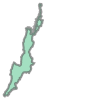

In [13]:

# Luego, usa la función 'unary_union' para fusionar todas las geometrías de las UPLs rurales en una sola
upl_rurales_union = df_upl_rurales.geometry.unary_union
upl_rurales_union

In [14]:

# Asegúrate de que ambos GeoDataFrames estén en el mismo sistema de coordenadas
df_plot.set_crs(gdf_upl.crs, inplace=True)


# Ahora, puedes usar la función 'difference' para obtener la geometría de las localidades quitando las zonas rurales
df_plot['geometry'] =df_plot['geometry'].difference(upl_rurales_union)

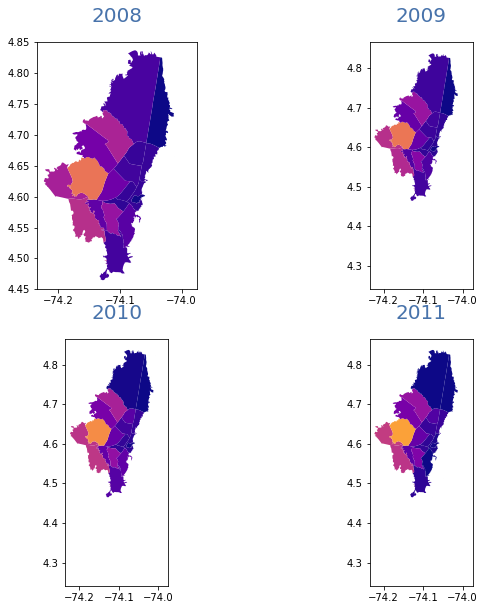

In [15]:
# Control del tamaño de la figura del mapa
#plt.subplot(221)
#fig, ax = plt.subplots(figsize=(10, 10))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(10, 10))
# Control del título y los ejes
ax1.set_title('2008', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
#ax1.set_xlabel('Longitud')
#ax1.set_ylabel('Latitud')
 # Añadir la leyenda separada del mapa
#from mpl_toolkits.axes_grid1 import make_axes_locatable
#divider = make_axes_locatable(ax1)
#cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Mostrar el mapa finalizado
df_plot.plot(column='muertes_estimadas_2008', vmin=muertes_min , vmax=muertes_max ,cmap='plasma', ax=ax1, zorder=5)

ax2.set_title('2009', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
df_plot.plot(column='muertes_estimadas_2009',  vmin=muertes_min , vmax=muertes_max,cmap='plasma', ax=ax2, zorder=5)
#plt.clim(0,200)

ax3.set_title('2010', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
df_plot.plot(column='muertes_estimadas_2010',  vmin=muertes_min , vmax=muertes_max,cmap='plasma', ax=ax3, zorder=5)
             
ax4.set_title('2011', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
df_plot.plot(column='muertes_estimadas_2011',  vmin=muertes_min , vmax=muertes_max,cmap='plasma', ax=ax4, zorder=5)

ax1.set_ylim(4.45, 4.85)
#ax1.set_xlim(-74.2, -74.0)
plt.show()

## % Muertes cardio metabólicas

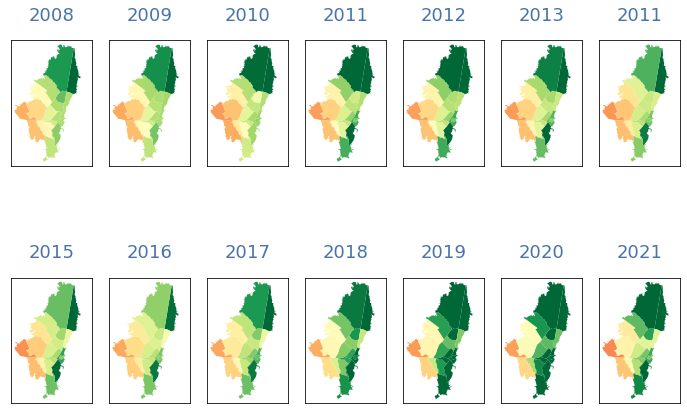

In [16]:
# Control del tamaño de la figura del mapa
#plt.subplot(221)
#fig, ax = plt.subplots(figsize=(10, 10))
muertes_min = 0 
muertes_max = 30
nn = 18
fig, ((ax1, ax2,ax3,ax4,ax5,ax6,ax7),
      (ax8, ax9,ax10,ax11,ax12,ax13,ax14)
     ) = plt.subplots(nrows=2, ncols=7,figsize=(12, 8),facecolor = 'white')
# Control del título y los ejes
ax1.set_title('2008', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylim(4.45, 4.85)
cmap_reversed = mpl.cm.get_cmap('RdYlGn').reversed()

# Mostrar el mapa finalizado
df_plot.plot(column='%muertes_estimadas_2008', vmin=muertes_min , vmax=muertes_max ,cmap=cmap_reversed, 
             ax=ax1, zorder=5)

ax2.set_title('2009', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='%muertes_estimadas_2009',  vmin=muertes_min , vmax=muertes_max,cmap=cmap_reversed, ax=ax2, zorder=5)
#plt.clim(0,200)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_ylim(4.45, 4.85)

ax3.set_title('2010', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='%muertes_estimadas_2010',  vmin=muertes_min , vmax=muertes_max,cmap=cmap_reversed, ax=ax3, zorder=5)

ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_ylim(4.45, 4.85)

ax4.set_title('2011', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='%muertes_estimadas_2011',  vmin=muertes_min , vmax=muertes_max,
             cmap=cmap_reversed, ax=ax4, zorder=5)
ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_ylim(4.45, 4.85)

ax5.set_title('2012', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='%muertes_estimadas_2012',  vmin=muertes_min , vmax=muertes_max,
             cmap=cmap_reversed, ax=ax5, zorder=5)
ax5.set_xticks([])
ax5.set_yticks([])
ax5.set_ylim(4.45, 4.85)

ax6.set_title('2013', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='%muertes_estimadas_2013',  vmin=muertes_min , vmax=muertes_max,
             cmap=cmap_reversed, ax=ax6, zorder=5)
ax6.set_xticks([])
ax6.set_yticks([])
ax6.set_ylim(4.45, 4.85)


ax7.set_title('2011', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='%muertes_estimadas_2014',  vmin=muertes_min , vmax=muertes_max,
             cmap=cmap_reversed, ax=ax7, zorder=5)
ax7.set_xticks([])
ax7.set_yticks([])
ax7.set_ylim(4.45, 4.85)

ax8.set_title('2015', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='%muertes_estimadas_2015',  vmin=muertes_min , vmax=muertes_max,
             cmap=cmap_reversed, ax=ax8, zorder=5)
ax8.set_xticks([])
ax8.set_yticks([])
ax8.set_ylim(4.45, 4.85)

ax9.set_title('2016', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='%muertes_estimadas_2016',  vmin=muertes_min , vmax=muertes_max,
             cmap=cmap_reversed, ax=ax9, zorder=5)
ax9.set_xticks([])
ax9.set_yticks([])
ax9.set_ylim(4.45, 4.85)

ax10.set_title('2017', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='%muertes_estimadas_2017',  vmin=muertes_min , vmax=muertes_max,
             cmap=cmap_reversed, ax=ax10, zorder=5)
ax10.set_xticks([])
ax10.set_yticks([])
ax10.set_ylim(4.45, 4.85)

ax11.set_title('2018', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='%muertes_estimadas_2018',  vmin=muertes_min , vmax=muertes_max,
             cmap=cmap_reversed, ax=ax11, zorder=5)
ax11.set_xticks([])
ax11.set_yticks([])
ax11.set_ylim(4.45, 4.85)

ax12.set_title('2019', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='%muertes_estimadas_2019',  vmin=muertes_min , vmax=muertes_max,
             cmap=cmap_reversed, ax=ax12, zorder=5)
ax12.set_xticks([])
ax12.set_yticks([])
ax12.set_ylim(4.45, 4.85)

ax13.set_title('2020', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='%muertes_estimadas_2020',  vmin=muertes_min , vmax=muertes_max,
             cmap=cmap_reversed, ax=ax13, zorder=5)
ax13.set_xticks([])
ax13.set_yticks([])
ax13.set_ylim(4.45, 4.85)

ax14.set_title('2021', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='%muertes_estimadas_2021',  vmin=muertes_min , vmax=muertes_max,
             cmap=cmap_reversed, ax=ax14, zorder=5)
ax14.set_xticks([])
ax14.set_yticks([])
ax14.set_ylim(4.45, 4.85)
#handles, labels = ax1.get_legend_handles_labels()
#fig.legend(handles, labels)#, loc='upper center')
#handles, labels = plt.gca().get_legend_handles_labels()
#labels = list(df_plot['%muertes_estimadas_2011'])
#ax1.legend(labels = labels)
plt.show()

In [17]:
fig.savefig('salidas/porcentaje_muertes.png')

<AxesSubplot:title={'center':'2008'}>

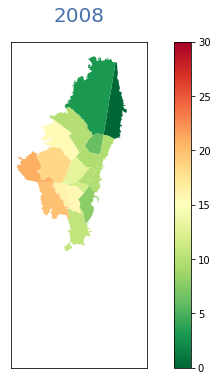

In [18]:
# Control del tamaño de la figura del mapa
#plt.subplot(221)
fig, ax = plt.subplots(figsize=(10, 6),facecolor = 'white')
muertes_min = 0 
muertes_max = 30
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(5, 10),facecolor = 'white')
# Control del título y los ejes
ax.set_title('2008', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xticks([])
ax.set_yticks([])
 
# Mostrar el mapa finalizado
df_plot.plot(column='%muertes_estimadas_2008', vmin=muertes_min , vmax=muertes_max ,cmap=cmap_reversed, 
             ax=ax, zorder=5, legend = True)


## Volumen de muertes

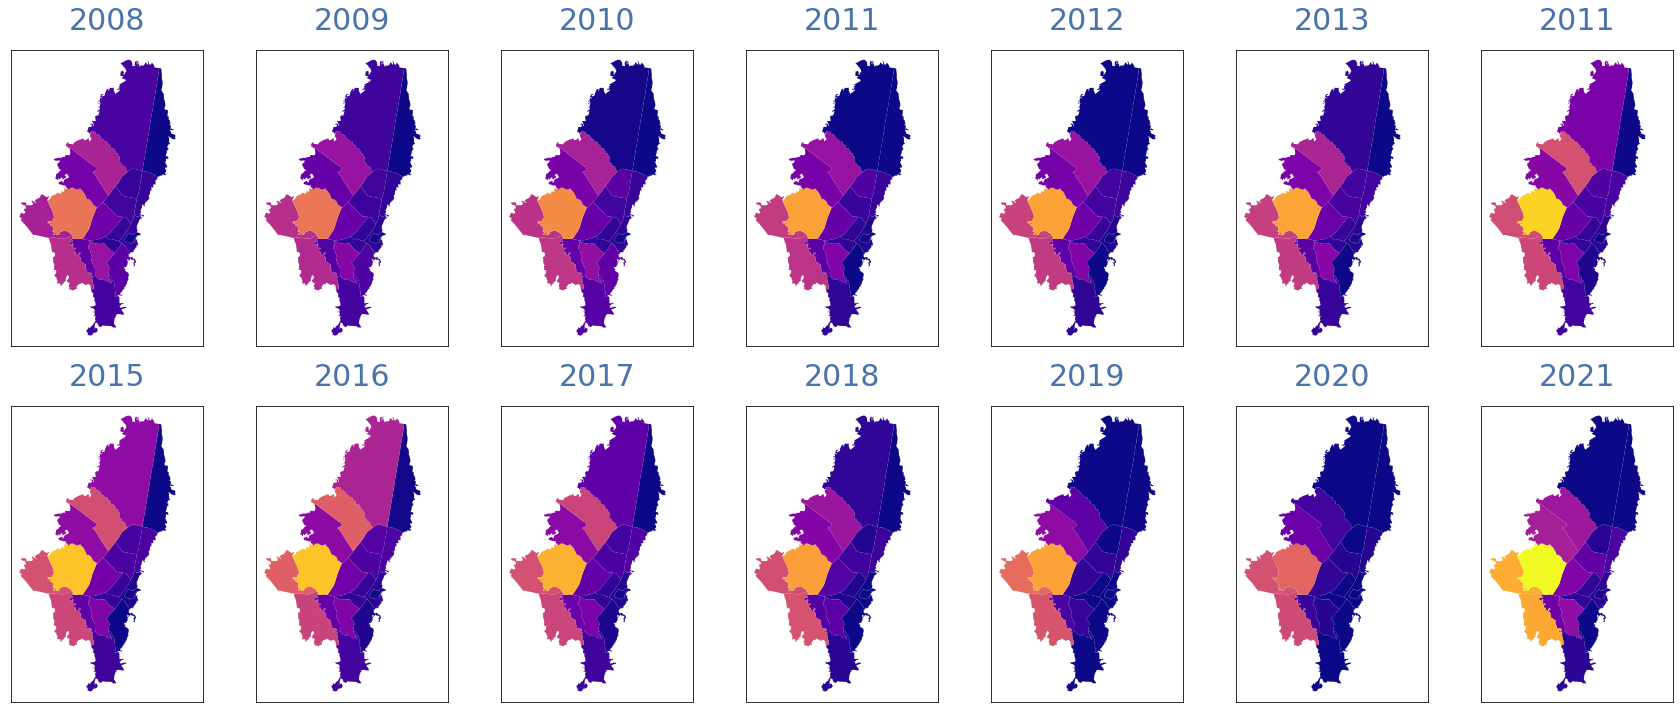

In [19]:
# Control del tamaño de la figura del mapa
#plt.subplot(221)
#fig, ax = plt.subplots(figsize=(10, 10))
muertes_min = int(df0['muertes_estimadas'].min())
muertes_max = int(df0['muertes_estimadas'].max())
#nn = 18
nn = 30
fig, ((ax1, ax2,ax3,ax4,ax5,ax6,ax7),
      (ax8, ax9,ax10,ax11,ax12,ax13,ax14)
     ) = plt.subplots(nrows=2, ncols=7,figsize=(30, 12),facecolor = 'white')
# Control del título y los ejes
ax1.set_title('2008', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylim(4.45, 4.85) 
# Mostrar el mapa finalizado
df_plot.plot(column='muertes_estimadas_2008', vmin=muertes_min , vmax=muertes_max ,cmap='plasma', 
             ax=ax1, zorder=5)

ax2.set_title('2009', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='muertes_estimadas_2009',  vmin=muertes_min , vmax=muertes_max,cmap='plasma', ax=ax2, zorder=5)
#plt.clim(0,200)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_ylim(4.45, 4.85)

ax3.set_title('2010', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='muertes_estimadas_2010',  vmin=muertes_min , vmax=muertes_max,cmap='plasma', ax=ax3, zorder=5)

ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_ylim(4.45, 4.85)

ax4.set_title('2011', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='muertes_estimadas_2011',  vmin=muertes_min , vmax=muertes_max,
             cmap='plasma', ax=ax4, zorder=5)
ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_ylim(4.45, 4.85)

ax5.set_title('2012', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='muertes_estimadas_2012',  vmin=muertes_min , vmax=muertes_max,
             cmap='plasma', ax=ax5, zorder=5)
ax5.set_xticks([])
ax5.set_yticks([])
ax5.set_ylim(4.45, 4.85)

ax6.set_title('2013', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='muertes_estimadas_2013',  vmin=muertes_min , vmax=muertes_max,
             cmap='plasma', ax=ax6, zorder=5)
ax6.set_xticks([])
ax6.set_yticks([])
ax6.set_ylim(4.45, 4.85)

ax7.set_title('2011', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='muertes_estimadas_2014',  vmin=muertes_min , vmax=muertes_max,
             cmap='plasma', ax=ax7, zorder=5)
ax7.set_xticks([])
ax7.set_yticks([])
ax7.set_ylim(4.45, 4.85)

ax8.set_title('2015', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='muertes_estimadas_2015',  vmin=muertes_min , vmax=muertes_max,
             cmap='plasma', ax=ax8, zorder=5)
ax8.set_xticks([])
ax8.set_yticks([])
ax8.set_ylim(4.45, 4.85)


ax9.set_title('2016', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='muertes_estimadas_2016',  vmin=muertes_min , vmax=muertes_max,
             cmap='plasma', ax=ax9, zorder=5)
ax9.set_xticks([])
ax9.set_yticks([])
ax9.set_ylim(4.45, 4.85)


ax10.set_title('2017', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='muertes_estimadas_2017',  vmin=muertes_min , vmax=muertes_max,
             cmap='plasma', ax=ax10, zorder=5)
ax10.set_xticks([])
ax10.set_yticks([])
ax10.set_ylim(4.45, 4.85)


ax11.set_title('2018', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='muertes_estimadas_2018',  vmin=muertes_min , vmax=muertes_max,
             cmap='plasma', ax=ax11, zorder=5)
ax11.set_xticks([])
ax11.set_yticks([])
ax11.set_ylim(4.45, 4.85)

ax12.set_title('2019', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='muertes_estimadas_2019',  vmin=muertes_min , vmax=muertes_max,
             cmap='plasma', ax=ax12, zorder=5)
ax12.set_xticks([])
ax12.set_yticks([])
ax12.set_ylim(4.45, 4.85)

ax13.set_title('2020', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='muertes_estimadas_2020',  vmin=muertes_min , vmax=muertes_max,
             cmap='plasma', ax=ax13, zorder=5)
ax13.set_xticks([])
ax13.set_yticks([])
ax13.set_ylim(4.45, 4.85)

ax14.set_title('2021', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='muertes_estimadas_2021',  vmin=muertes_min , vmax=muertes_max,
             cmap='plasma', ax=ax14, zorder=5)
ax14.set_xticks([])
ax14.set_yticks([])
ax14.set_ylim(4.45, 4.85)
#handles, labels = ax1.get_legend_handles_labels()
#fig.legend(handles, labels)#, loc='upper center')
#handles, labels = plt.gca().get_legend_handles_labels()
#labels = list(df_plot['%muertes_estimadas_2011'])
#ax1.legend(labels = labels)
plt.show()

In [20]:
fig.savefig('salidas/muertes.png')

<AxesSubplot:title={'center':'2008'}>

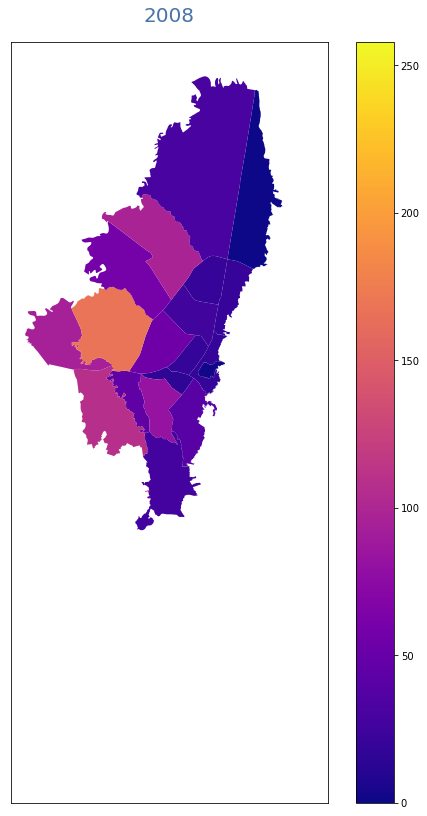

In [21]:
# Control del tamaño de la figura del mapa
#plt.subplot(221)
fig, ax = plt.subplots(figsize=(10, 14),facecolor = 'white')
muertes_min = int(df0['muertes_estimadas'].min())
muertes_max = int(df0['muertes_estimadas'].max())
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(5, 10),facecolor = 'white')
# Control del título y los ejes
ax.set_title('2008', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xticks([])
ax.set_yticks([])
 
# Mostrar el mapa finalizado
df_plot.plot(column='muertes_estimadas_2008', vmin=muertes_min , vmax=muertes_max ,cmap= 'plasma', 
             ax=ax, zorder=5, legend = True)
df_plot.plot(column='muertes_estimadas_2008', vmin=muertes_min , vmax=muertes_max ,cmap='plasma', 
             ax=ax1, zorder=5)


<AxesSubplot:title={'center':'2008'}>

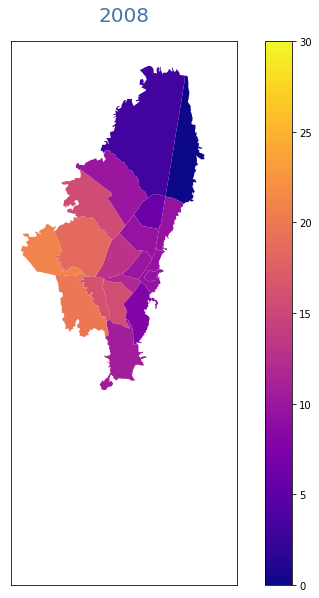

In [22]:

# Control del tamaño de la figura del mapa
#plt.subplot(221)
fig, ax = plt.subplots(figsize=(10, 10),facecolor = 'white')
muertes_min = 0 
muertes_max = 30
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(5, 10),facecolor = 'white')
# Control del título y los ejes
ax.set_title('2008', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xticks([])
ax.set_yticks([])
#colors = ["green", "yellow", "red"]
#my_cmap = ListedColormap(colors, name="my_cmap")
cmap_reversed = mpl.cm.get_cmap('RdYlGn').reversed()
# Mostrar el mapa finalizado
df_plot.plot(column='%muertes_estimadas_2008', vmin=muertes_min , vmax=muertes_max ,cmap="plasma", 
             ax=ax, zorder=5, legend = True)

## Niveles de PM25 

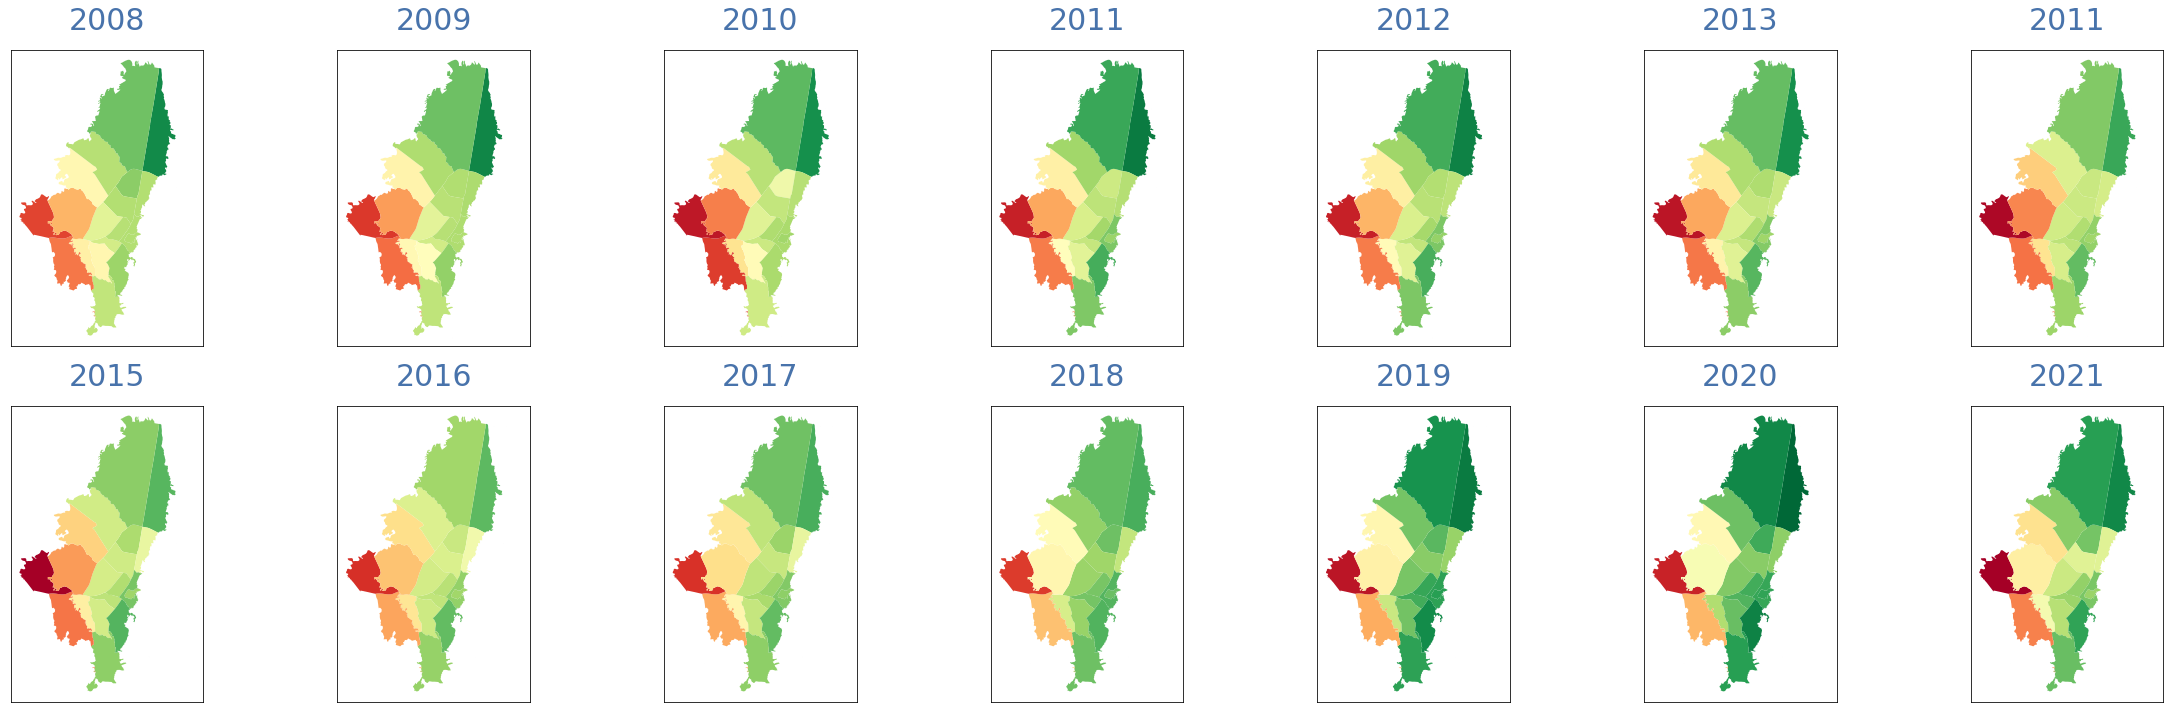

In [23]:
# Control del tamaño de la figura del mapa
#plt.subplot(221)
#fig, ax = plt.subplots(figsize=(10, 10))
muertes_min = int(df0['pm25_pred'].min())
muertes_max = int(df0['pm25_pred'].max())
#nn = 18
nn = 30
fig, ((ax1, ax2,ax3,ax4,ax5,ax6,ax7),
      (ax8, ax9,ax10,ax11,ax12,ax13,ax14)
     ) = plt.subplots(nrows=2, ncols=7,figsize=(40, 12),facecolor = 'white')
# Control del título y los ejes



ax1.set_title('2008', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylim(4.45, 4.85)
#ax1.figsize(3,2)
cmap_reversed = mpl.cm.get_cmap('RdYlGn').reversed()
# Mostrar el mapa finalizado
df_plot.plot(column='pm25_pred_2008', vmin=muertes_min , vmax=muertes_max ,cmap=cmap_reversed, 
             ax=ax1, zorder=5)

ax2.set_title('2009', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='pm25_pred_2009',  vmin=muertes_min , vmax=muertes_max,cmap=cmap_reversed, ax=ax2, zorder=5)
#plt.clim(0,200)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_ylim(4.45, 4.85)

ax3.set_title('2010', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='pm25_pred_2010',  vmin=muertes_min , vmax=muertes_max,cmap=cmap_reversed, ax=ax3, zorder=5)

ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_ylim(4.45, 4.85)

ax4.set_title('2011', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='pm25_pred_2011',  vmin=muertes_min , vmax=muertes_max,
             cmap=cmap_reversed, ax=ax4, zorder=5)
ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_ylim(4.45, 4.85)


ax5.set_title('2012', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='pm25_pred_2012',  vmin=muertes_min , vmax=muertes_max,
             cmap=cmap_reversed, ax=ax5, zorder=5)
ax5.set_xticks([])
ax5.set_yticks([])
ax5.set_ylim(4.45, 4.85)

ax6.set_title('2013', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='pm25_pred_2013',  vmin=muertes_min , vmax=muertes_max,
             cmap=cmap_reversed, ax=ax6, zorder=5)
ax6.set_xticks([])
ax6.set_yticks([])
ax6.set_ylim(4.45, 4.85)


ax7.set_title('2011', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='pm25_pred_2014',  vmin=muertes_min , vmax=muertes_max,
             cmap=cmap_reversed, ax=ax7, zorder=5)
ax7.set_xticks([])
ax7.set_yticks([])
ax7.set_ylim(4.45, 4.85)


ax8.set_title('2015', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='pm25_pred_2015',  vmin=muertes_min , vmax=muertes_max,
             cmap=cmap_reversed, ax=ax8, zorder=5)
ax8.set_xticks([])
ax8.set_yticks([])
ax8.set_ylim(4.45, 4.85)

ax9.set_title('2016', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='pm25_pred_2016',  vmin=muertes_min , vmax=muertes_max,
             cmap=cmap_reversed, ax=ax9, zorder=5)
ax9.set_xticks([])
ax9.set_yticks([])
ax9.set_ylim(4.45, 4.85)

ax10.set_title('2017', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='pm25_pred_2017',  vmin=muertes_min , vmax=muertes_max,
             cmap=cmap_reversed, ax=ax10, zorder=5)
ax10.set_xticks([])
ax10.set_yticks([])
ax10.set_ylim(4.45, 4.85)

ax11.set_title('2018', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='pm25_pred_2018',  vmin=muertes_min , vmax=muertes_max,
             cmap=cmap_reversed, ax=ax11, zorder=5)
ax11.set_xticks([])
ax11.set_yticks([])
ax11.set_ylim(4.45, 4.85)

ax12.set_title('2019', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='pm25_pred_2019',  vmin=muertes_min , vmax=muertes_max,
             cmap=cmap_reversed, ax=ax12, zorder=5)
ax12.set_xticks([])
ax12.set_yticks([])
ax12.set_ylim(4.45, 4.85)


ax13.set_title('2020', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='pm25_pred_2020',  vmin=muertes_min , vmax=muertes_max,
             cmap=cmap_reversed, ax=ax13, zorder=5)
ax13.set_xticks([])
ax13.set_yticks([])
ax13.set_ylim(4.45, 4.85)

ax14.set_title('2021', 
             pad = 20, 
             fontdict={'fontsize':nn, 'color': '#4873ab'})
df_plot.plot(column='pm25_pred_2021',  vmin=muertes_min , vmax=muertes_max,
             cmap=cmap_reversed, ax=ax14, zorder=5)
ax14.set_xticks([])
ax14.set_yticks([])
ax14.set_ylim(4.45, 4.85)
#handles, labels = ax1.get_legend_handles_labels()
#fig.legend(handles, labels)#, loc='upper center')
#handles, labels = plt.gca().get_legend_handles_labels()
#labels = list(df_plot['pm25_pred_2011'])
#ax1.legend(labels = labels)
plt.show()

In [24]:
fig.savefig('salidas/NivelesPM25.png')

<AxesSubplot:title={'center':'2008'}>

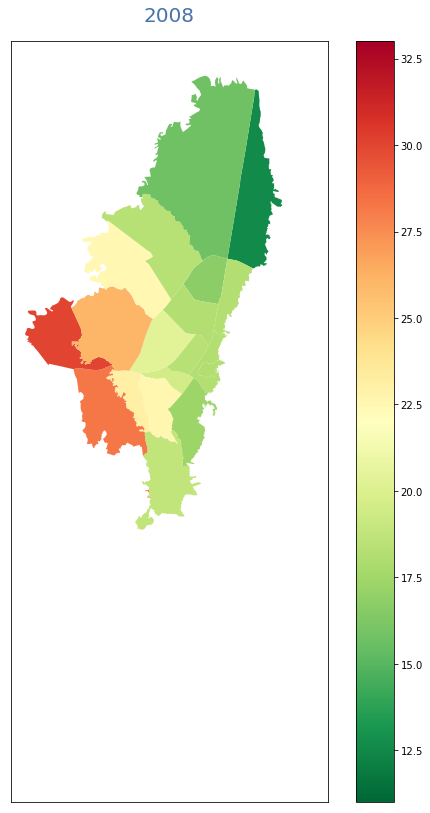

In [25]:
import numpy as np
fig, ax = plt.subplots(figsize=(10,14),facecolor = 'white')
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(5, 10),facecolor = 'white')
# Control del título y los ejes
ax.set_title('2008', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xticks([])
ax.set_yticks([])
#colors = ["green", "yellow", "red"]
#my_cmap = ListedColormap(colors, name="my_cmap")
cmap_reversed = mpl.cm.get_cmap('RdYlGn').reversed()
# Mostrar el mapa finalizado
df_plot.plot(column='pm25_pred_2008', vmin=muertes_min , vmax=muertes_max ,cmap=cmap_reversed, 
             ax=ax, zorder=5, legend = True)#, legend_kwds={"loc": "center left"})
#ax.tick_params(labelsize='50')
#ax.set_yticklabels(np.linspace(muertes_min,muertes_max, 10, dtype=np.dtype(np.uint64)), {'fontsize': 8})
# Ajustar el tamaño de la fuente en la leyenda
#leg = ax0.get_legend()
#leg.set_title('PM2.5 Predicciones 2008')
#for label in leg.get_texts():
#    label.set_fontsize(14)  # Tamaño de la fuente que prefieras
#ax0.tick_params(labelsize=40)